# Anomaly Detection Algorithm using KNN and Isolation Forest Algorithms

##### anomaly detection is a process of identifying the patterns by continuous learning from the data to detect the suspicious data or any anomalous patterns.this algorithm or system can be implemented by using various machine learning algorithms such as supervised, semi-supervised, unsupervised learning algorithms.and, the use cases for the anomaly detection include fraud detection, cybersecurity, manfacturing and quality control, IT management systems, and retail and e-commerce.

### Import the necessary libraries, including pandas, numpy, matplotlib, seaborn, sklearn etc.

In [15]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

# sea born style for plotting
sns.set_style('darkgrid')

## Load and Explore the Dataset

### Load the dataset from the CSV file and perform initial exploration such as checking null values, datatypes, and basic statistics.

In [16]:
# Load and Explore the dataset

# Load the data from the network_anomaly_dataset.csv file
df = pd.read_csv("C:/Users/Bhavyasree/Downloads/KalyanRepository/network_anomaly_dataset.csv", header=None, low_memory=False)

In [17]:
# print the first few rows of the uploaded dataset
print(df.head())

         0             1         2     3         4         5     6   \
0  duration  protocoltype   service  flag  srcbytes  dstbytes  land   
1         0           tcp  ftp_data    SF       491         0     0   
2         0           udp     other    SF       146         0     0   
3         0           tcp   private    S0         0         0     0   
4         0           tcp      http    SF       232      8153     0   

              7       8    9   ...                  33                  34  \
0  wrongfragment  urgent  hot  ...  dsthostsamesrvrate  dsthostdiffsrvrate   
1              0       0    0  ...                0.17                0.03   
2              0       0    0  ...                 0.0                 0.6   
3              0       0    0  ...                 0.1                0.05   
4              0       0    0  ...                 1.0                 0.0   

                       35                      36                 37  \
0  dsthostsamesrcportrate  dstho

## Preprocess the Data

### Handle the missing values, encoding categorical variables, and split the data into features and labels.

In [18]:
df = df.sample(frac=0.2, random_state=42)  # Use 60% of the data

In [19]:
# Check for null values in the dataset
null_values = df.isnull().sum()
print("Null values in each column:\n", null_values)

Null values in each column:
 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
dtype: int64


In [20]:
# Check the data type of each column
data_type = df.dtypes
print("Data type of each column:\n", data_type)

Data type of each column:
 0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
20    object
21    object
22    object
23    object
24    object
25    object
26    object
27    object
28    object
29    object
30    object
31    object
32    object
33    object
34    object
35    object
36    object
37    object
38    object
39    object
40    object
41    object
42    object
dtype: object


In [21]:
# Displaying basic statistics of the data
basic_stats = df.describe()
print("Basic statistics of the data:\n", basic_stats)

Basic statistics of the data:
            0      1      2      3      4      5      6      7      8      9   \
count   25195  25195  25195  25195  25195  25195  25195  25195  25195  25195   
unique    741      4     66     12   1638   3928      3      4      2     18   
top         0    tcp   http     SF      0      0      0      0      0      0   
freq    23244  20555   8183  15085   9774  13531  25190  24979  25194  24679   

        ...     33     34     35     36     37     38     39     40      41  \
count   ...  25195  25195  25195  25195  25195  25195  25195  25195   25195   
unique  ...    102    102    102     63    100     87    102     97      23   
top     ...    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  normal   
freq    ...   9891   9497  12528  17362  16334  17131  20686  21389   13483   

           42  
count   25195  
unique     23  
top        21  
freq    12512  

[4 rows x 43 columns]


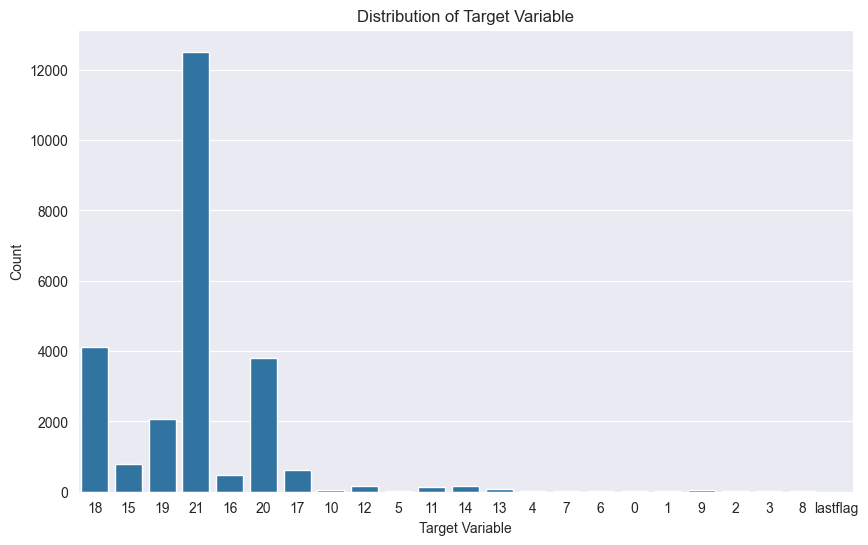

In [22]:
# Visualizing the distribution of the target variable , here we are assuming the last column as target.
plt.figure(figsize=(10, 6))
sns.countplot(x=df.iloc[:, -1])
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.show()

In [23]:
# Preprocess the data

# Handle missing values if any found
# Impute numerical features with their median
for col in df.select_dtypes(include=np.number):
    df[col] = df[col].fillna(df[col].median())

for col in df.select_dtypes(include=['object']):
    df[col] = df[col].fillna(df[col].mode()[0])  
# Encode the categeorical variables using one-hot encoding technique
df_encoded = pd.get_dummies(df, drop_first=True)

# Split the data into features and labels
X = df_encoded.iloc[:, :-1]
y = df_encoded.iloc[:, -1]

In [24]:
# Split the data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Pring the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (17636, 9158)
Shape of X_test: (7559, 9158)
Shape of y_train: (17636,)
Shape of y_test: (7559,)


## Feature Scaling

### Scale the features using StandardScaler or MinMaxScaler to normalize the data

In [26]:
#Feature Scaling

# Standardize the features using StandardScalar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Print first few rows of scaled training data
print("First Few Rows of scaled training data: \n", pd.DataFrame(X_train_scaled).head())

First Few Rows of scaled training data: 
        0         1        2        3        4        5     6        7     \
0 -0.125392 -0.033695 -0.00753 -0.00753 -0.00753 -0.00753   0.0 -0.00753   
1 -0.125392 -0.033695 -0.00753 -0.00753 -0.00753 -0.00753   0.0 -0.00753   
2 -0.125392 -0.033695 -0.00753 -0.00753 -0.00753 -0.00753   0.0 -0.00753   
3 -0.125392 -0.033695 -0.00753 -0.00753 -0.00753 -0.00753   0.0 -0.00753   
4 -0.125392 -0.033695 -0.00753 -0.00753 -0.00753 -0.00753   0.0 -0.00753   

      8        9     ...      9148      9149      9150      9151      9152  \
0 -0.00753 -0.00753  ... -0.029176 -0.419299 -0.992093 -0.019927 -0.031062   
1 -0.00753 -0.00753  ... -0.029176 -0.419299 -0.992093 -0.019927 -0.031062   
2 -0.00753 -0.00753  ... -0.029176 -0.419299 -0.992093 -0.019927 -0.031062   
3 -0.00753 -0.00753  ... -0.029176 -0.419299 -0.992093 -0.019927 -0.031062   
4 -0.00753 -0.00753  ... -0.029176 -0.419299  1.007970 -0.019927 -0.031062   

       9153      9154      9155 

In [28]:
# Print first few rows of scaled test data
print("First few Rows of scaled test data: \n", pd.DataFrame(X_test_scaled).head())

First few Rows of scaled test data: 
        0         1        2        3        4        5     6        7     \
0 -0.125392 -0.033695 -0.00753 -0.00753 -0.00753 -0.00753   0.0 -0.00753   
1 -0.125392 -0.033695 -0.00753 -0.00753 -0.00753 -0.00753   0.0 -0.00753   
2 -0.125392 -0.033695 -0.00753 -0.00753 -0.00753 -0.00753   0.0 -0.00753   
3 -0.125392 -0.033695 -0.00753 -0.00753 -0.00753 -0.00753   0.0 -0.00753   
4 -0.125392 -0.033695 -0.00753 -0.00753 -0.00753 -0.00753   0.0 -0.00753   

      8        9     ...      9148      9149      9150      9151      9152  \
0 -0.00753 -0.00753  ... -0.029176 -0.419299  1.007970 -0.019927 -0.031062   
1 -0.00753 -0.00753  ... -0.029176 -0.419299  1.007970 -0.019927 -0.031062   
2 -0.00753 -0.00753  ... -0.029176  2.384932 -0.992093 -0.019927 -0.031062   
3 -0.00753 -0.00753  ... -0.029176 -0.419299  1.007970 -0.019927 -0.031062   
4 -0.00753 -0.00753  ... -0.029176 -0.419299 -0.992093 -0.019927 -0.031062   

       9153      9154      9155     

## KNN For Anomaly Detection

### Here We are implementing KNN Algorithm to detect anomalies.

In [29]:
# KNN for anomaly detection
# Train KNN model

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test_scaled)

In [30]:
# Evaluate the model
labels = [0, 1]
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn, labels=labels)
class_report_knn = classification_report(y_test, y_pred_knn, zero_division=1)
f1_knn = f1_score(y_test, y_pred_knn, average = 'weighted')
precision_knn = precision_score(y_test, y_pred_knn, average = 'weighted', zero_division=1)
recallscore_knn = recall_score(y_test, y_pred_knn, average = 'weighted')

In [31]:
# printing evaluation metrics
print("Confusion Matrix for KNN: \n", conf_matrix_knn)
print("\nClassification Report for KNN:\n", class_report_knn)
print("F1 Score for KNN: ", f1_knn)
print("Precision for KNN: ", precision_score)
print("Recall for KNN: ", recallscore_knn)

Confusion Matrix for KNN: 
 [[7559    0]
 [   0    0]]

Classification Report for KNN:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      7559

    accuracy                           1.00      7559
   macro avg       1.00      1.00      1.00      7559
weighted avg       1.00      1.00      1.00      7559

F1 Score for KNN:  1.0
Precision for KNN:  <function precision_score at 0x0000022162ABBF60>
Recall for KNN:  1.0


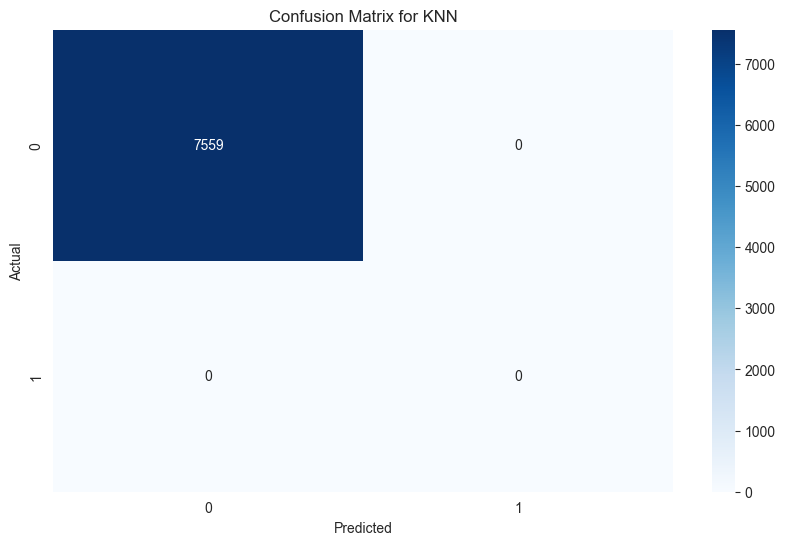

In [32]:
# Visialize the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Isolation Forest for Anomaly Detection

In [33]:
# Isolation Forest for Anomaly Detection

# Train the Isolation Forest Model

iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(X_train_scaled)

IsolationForest(contamination=0.1, random_state=42)

In [34]:
# Predict on the test set
y_pred_iso = iso_forest.predict(X_test_scaled)

In [35]:
# Convert predictions to binary (1 for normal, -1 for anomaly)
y_pred_iso = np.where(y_pred_iso == 1, 0, 1)

In [36]:
# Evalute the Model
conf_matrix_iso = confusion_matrix(y_test, y_pred_iso)
class_report_iso = classification_report(y_test, y_pred_iso, zero_division=1)
f1_iso = f1_score(y_test, y_pred_iso, average='weighted')
precision_iso = precision_score(y_test, y_pred_iso, average='weighted', zero_division=1)
recall_iso = recall_score(y_test, y_pred_iso, average='weighted', zero_division=1)

In [37]:
# Print evaluation metrics
print('Confusion Matrix for Isolation Forest:\n', conf_matrix_iso)
print('\nClassification Report for Isolation Forest:\n', class_report_iso)
print('F1 Score for Isolation Forest: ', f1_iso)
print('Precision for Isolation Forest: ', precision_iso)
print('Recall for Isolation Forest: ', recall_iso)

Confusion Matrix for Isolation Forest:
 [[6840  719]
 [   0    0]]

Classification Report for Isolation Forest:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95      7559
           1       0.00      1.00      0.00         0

    accuracy                           0.90      7559
   macro avg       0.50      0.95      0.48      7559
weighted avg       1.00      0.90      0.95      7559

F1 Score for Isolation Forest:  0.9500659768039447
Precision for Isolation Forest:  1.0
Recall for Isolation Forest:  0.9048815980949861


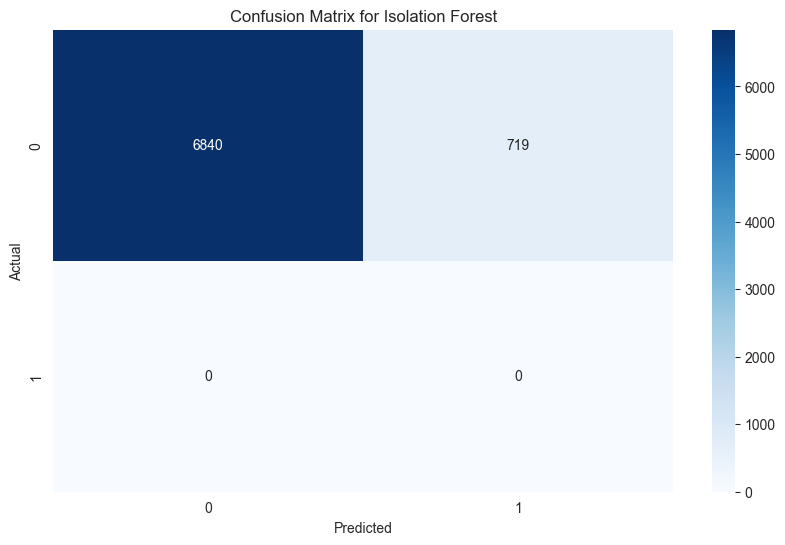

In [38]:
# Visualize the confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix_iso, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Isolation Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

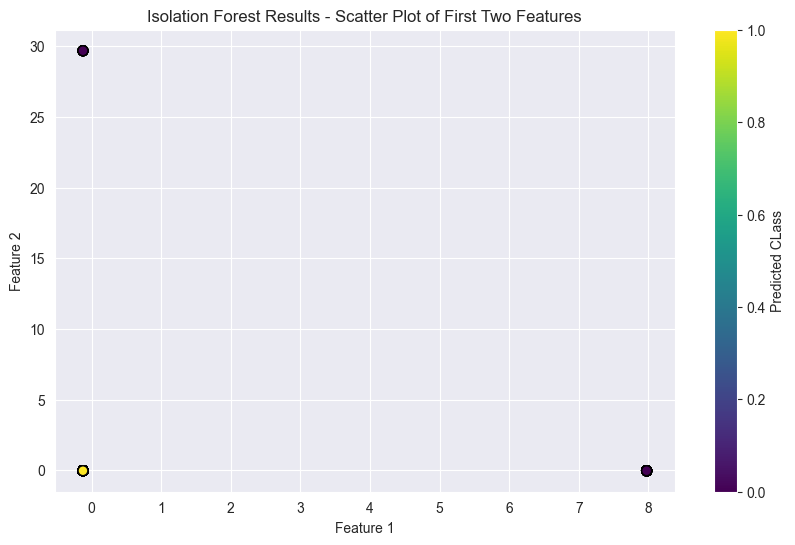

In [39]:
# Scatter plot of the first two features
plt.figure(figsize=(10,6))
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred_iso, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Isolation Forest Results - Scatter Plot of First Two Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Predicted CLass')
plt.show()

## Compare Models - KNN v/s Isolation Forest

In [40]:
# Compare Models

metrics_comparision = pd.DataFrame({
    'Model': ['KNN', 'Isolation Forest'],
    'F1 Score': [f1_knn, f1_iso],
    'Precision': [precision_knn, precision_iso],
    'Recall': [recallscore_knn, recall_iso]
})

# Display the comparision of the evaluation metrics
print('Comparision of Evaluation Metrics:\n', metrics_comparision)

Comparision of Evaluation Metrics:
               Model  F1 Score  Precision    Recall
0               KNN  1.000000        1.0  1.000000
1  Isolation Forest  0.950066        1.0  0.904882


<Figure size 1200x800 with 0 Axes>

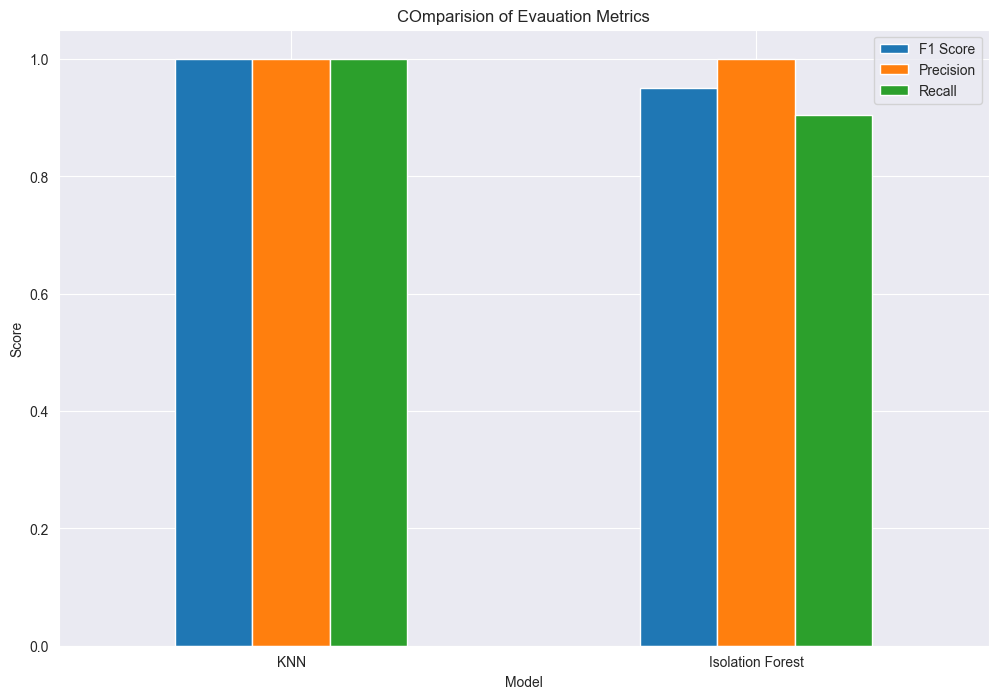

In [41]:
# Visualize the comparision of evalution metrics
plt.figure(figsize=(12, 8))
metrics_comparision.set_index('Model').plot(kind='bar', figsize=(12, 8))
plt.title('COmparision of Evauation Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

Text(220.72222222222223, 0.5, 'Actual')

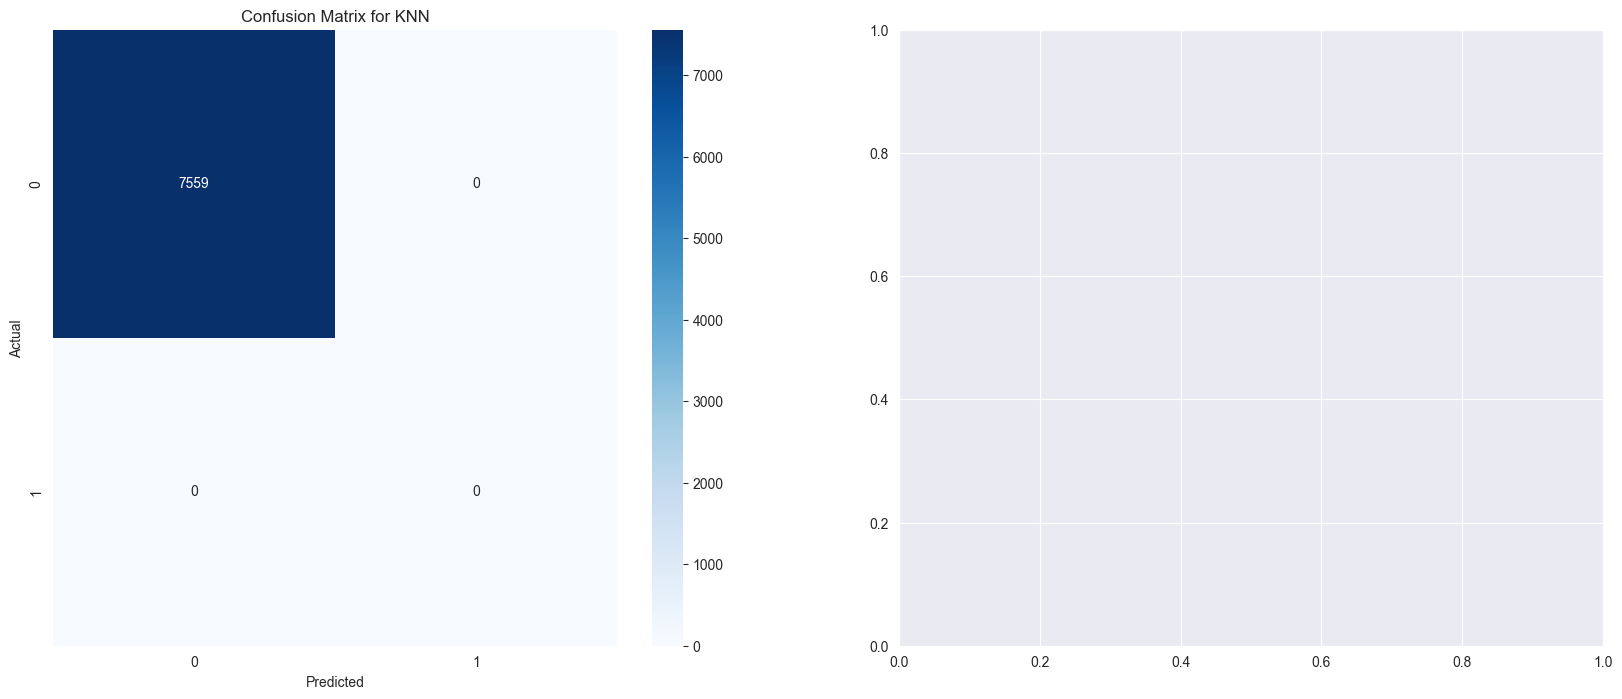

In [42]:
# Visualize the confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Confusion matrix KNN
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix for KNN')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

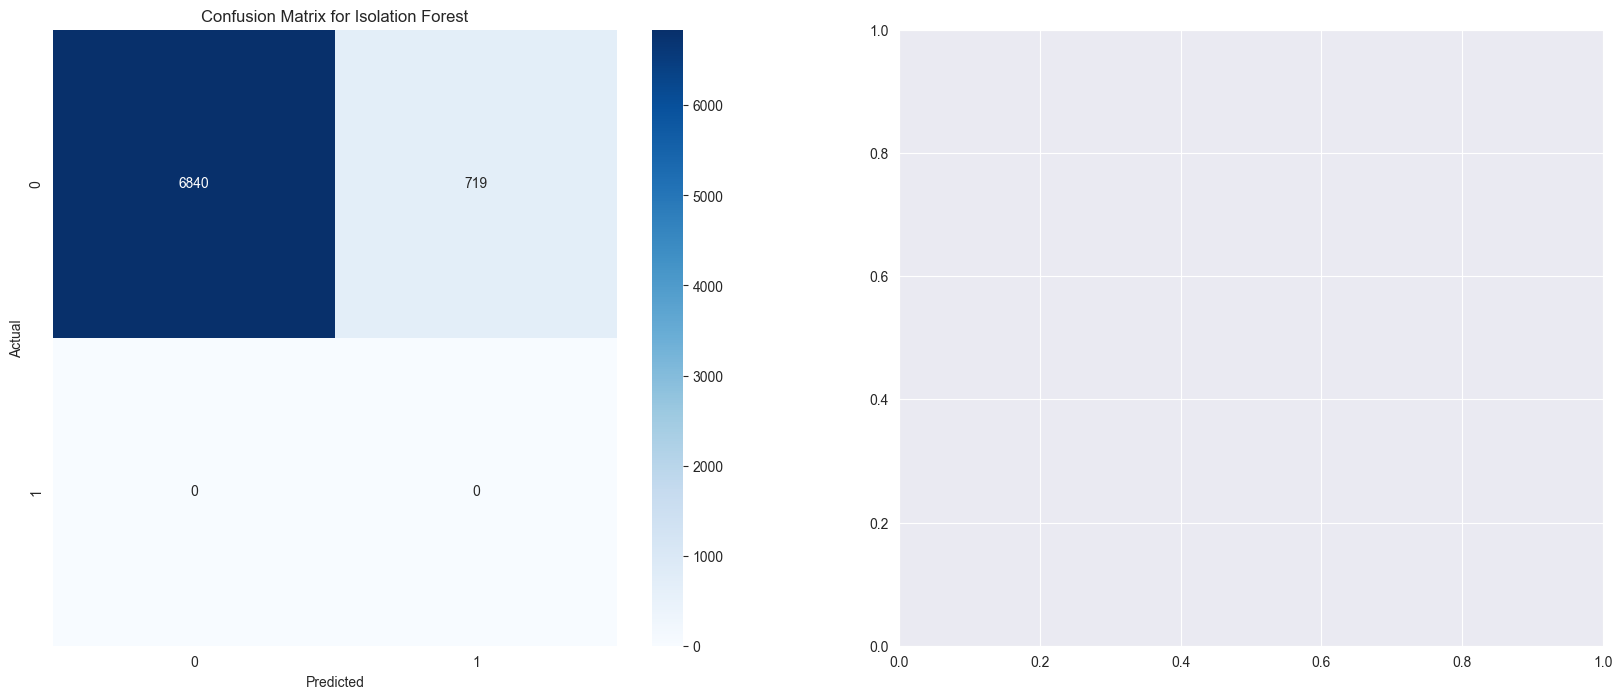

In [43]:
# Visualize the confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Confusion matrix KNN
sns.heatmap(conf_matrix_iso, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix for Isolation Forest')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

plt.show()

### Conclusion

##### as we seen in the above results by comparing both models i.e KNN vs Isolation Forest, we got to know that K-nearest-neighbors perfromed better than Isolation model particularity for the given data set. The detail results of the each model as follows:

#### KNN Model results:

#### Isolation Model:

##### as we can observe that KNN model performed better than Ioslation forest model interms of all precision, recall and f1-score. in the same way we can observe Isolation forest model is also performed better and up-to the mark when we observe precision is 100% accurate for the Isolation model but when it comes to f1-score and recall isolation forest failed to detect the some anomalies correctly.